The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(302, 402)

DEBUG:root:Initialized P-grid using projection +proj=stere  +lon_0=-45 +lat_0=90 +lat_ts=80 +ellps=sphere
DEBUG:root:Lower left corner lon/lat of grid: (-89.5,45.5)
DEBUG:root:Grid spacing in projection coords: (2e+04,2e+04)
DEBUG:root:Number of grid Nodes in x/y      : (  400,  300)
DEBUG:root:Min   x projection coordinate = -3.65e+06
DEBUG:root:Max   x projection coordinate = 4.37e+06
DEBUG:root:Min   y projection coordinate = -3.71e+06
DEBUG:root:Max   y projection coordinate = 2.31e+06
DEBUG:root:Min lon = -180
DEBUG:root:Max lon = 180
DEBUG:root:Min lat = 41.2
DEBUG:root:Max lat = 89.9


 (402,) (302,)
(300, 400)
45.75 365.0
day angle= 0.787549939188
time hour angle at Greenwich= 1.57079632679
declination in degrees      :  -12.6951527577
equation of time  in degrees:  -3.56327112602
equation of time  in minutes:  -14.2530845041
Zenith at solar noon        :  [[ 58.26099909  58.36289378  58.46492236 ...,  90.          90.          90.        ]
 [ 58.37826028  58.48019786  58.58226938 ...,  90.          90.          90.        ]
 [ 58.4956461   58.5976268   58.6997415  ...,  90.          90.          90.        ]
 ..., 
 [ 90.          90.          90.         ...,  90.          90.          90.        ]
 [ 90.          90.          90.         ...,  90.          90.          90.        ]
 [ 90.          90.          90.         ...,  90.          90.          90.        ]]
time hour angle at Greenwich, corrected for eot= 1.5086055135


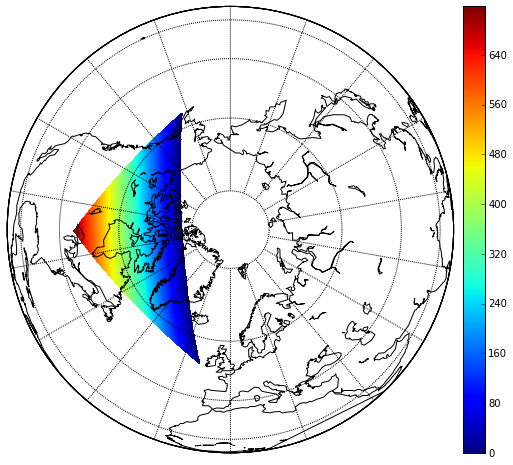

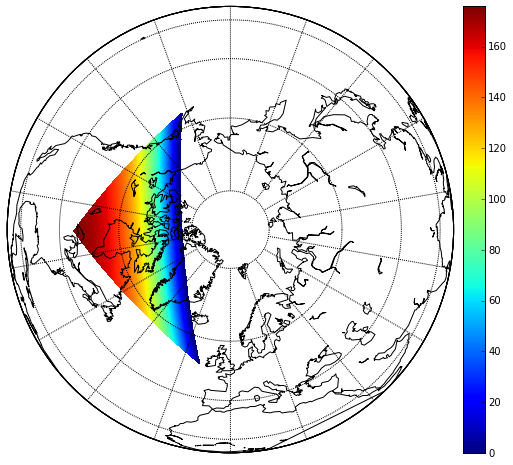

In [44]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  

import datetime
import numpy
import modeltools.forcing.atmosphere
import pylab
from mpl_toolkits.basemap import Basemap, shiftgrid
pylab.rcParams['figure.figsize'] = 12, 8

m = Basemap(resolution='c',projection='ortho',lat_0=90.,lon_0=0.)



# Define (or read) grid
grid1=modeltools.grid.Proj4Grid("+proj=stere  +lon_0=-45 +lat_0=90 +lat_ts=80 +ellps=sphere",
                          -89.5,45.5,20000,20000,400,300)
mlon,mlat=grid1.pgrid()
print mlon.shape
x,y=m(mlon,mlat)

dt = datetime.datetime(2015,2,15,18,0,0)
srad_top,cosz,cosz_noon = modeltools.forcing.atmosphere.qsw_et(dt,mlon,mlat)
ssrd =  modeltools.forcing.atmosphere.qsw_allsky_rosato(srad_top,cosz,cosz_noon,numpy.ones(cosz.shape)*0) 

srad_top=numpy.ma.masked_where(srad_top<=0.,srad_top)
ssrd=numpy.ma.masked_where(ssrd<=0.,ssrd)

parallels = numpy.arange(-80.,90,20.)
meridians = numpy.arange(0.,360.,20.)
m.pcolormesh(x,y,srad_top)
m.colorbar()
m.drawparallels(parallels)
m.drawmeridians(meridians)
m.drawcoastlines()

pylab.figure()
m.pcolormesh(x,y,srad_top-ssrd)
m.colorbar()
m.drawparallels(parallels)
m.drawmeridians(meridians)
m.drawcoastlines()

